In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df=pd.read_excel('stringaprobo.xlsx')

In [3]:
df1=df.drop(columns=['carrera','legajo','cantidad_idiomas'])

In [4]:
inputs = pd.get_dummies(df1, columns=['nombre_carrera', 'ingreso', 'sexo', 'pais_procedencia',
       'prov_procedencia', 'edad', 'estado_civil', 'cant_hijos', 'vive_con',
       'tiene_beca', 'aporte_familiar', 'obra_social', 'trabajo', 'padre_vive',
       'padre_ult_est_curs', 'padre_trabajo', 'madre_vive',
       'madre_ult_est_curs', 'madre_trabajo', 'dep_practica', 'idioma_ingles',
       'idioma_franc', 'idioma_portu', 'idioma_itali', 'idioma_aleman'])

In [5]:
target=np.array(inputs['fechaapro_matematica_al_21-10-2017'])
inputs=inputs.drop(columns=['matcursprisem','fechaapro_matematica_al_21-10-2017', 
                            'cantmataprob_al_21-10-2017','promedio_con_aplaz_al_21-10-2017', 
                            'promedio_sin_aplaz_al_21-10-2017'])

In [6]:
inputs_list=list(inputs.columns)
inputs=np.array(inputs)

In [7]:
from sklearn.model_selection import train_test_split

train_inputs, test_inputs, train_target, test_target = train_test_split(inputs, target, test_size = 0.2, random_state = 42)

In [8]:
print('Training Features Shape:', train_inputs.shape)
print('Training Labels Shape:', train_target.shape)
print('Testing Features Shape:', test_inputs.shape)
print('Testing Labels Shape:', test_target.shape)

Training Features Shape: (1896, 132)
Training Labels Shape: (1896,)
Testing Features Shape: (474, 132)
Testing Labels Shape: (474,)


In [9]:
tree=RandomForestClassifier()
tree.fit(train_inputs,train_target)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [10]:
y_pred = tree.predict(test_inputs)

In [11]:
cm=confusion_matrix(test_target, y_pred)
cm

array([[268,  45],
       [ 85,  76]], dtype=int64)

In [12]:
accuracy=accuracy_score(test_target, y_pred)

In [13]:
accuracy

0.7257383966244726

In [14]:
model_params={
   
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[10,50,100],
            'max_depth':[5, 10],
            'min_samples_split':[10,50,100],
            'min_samples_leaf':[10,50,100],
            'criterion':['gini','entropy']
        }
    }
}

In [15]:
from sklearn.model_selection import GridSearchCV
score=[]

for model_name, mp in model_params.items():
    clf=GridSearchCV(mp['model'],mp['params'],cv=5, return_train_score=False)
    
    clf.fit(train_inputs, train_target)
    
    score.append({
        'model':model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [16]:
df=pd.DataFrame(score,columns=['model','best_score','best_params'])

In [17]:
df.to_excel('forestbest.xls')

In [18]:
predictions = clf.predict(test_inputs)

In [19]:
accuracy_score(test_target, predictions)

0.7468354430379747

In [20]:
cm=confusion_matrix(test_target, predictions)
cm

array([[282,  31],
       [ 89,  72]], dtype=int64)

Text(24.0, 0.5, 'Target')

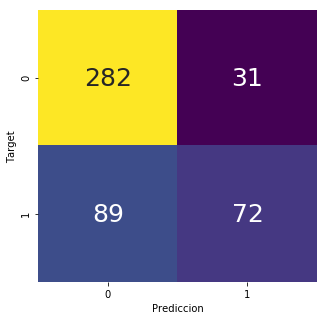

In [21]:
import matplotlib.pyplot as plt
import seaborn as sn
# convert the ndarray to a pandas dataframe
cm_df = pd.DataFrame(cm)
# set the size of the figure
plt.figure(figsize = (5,5))
sn.heatmap(cm_df, 
           annot=True, annot_kws={"size": 25},
           fmt="d",         # decimals format
           xticklabels=True, 
           yticklabels=True,
           cmap="viridis", 
           cbar=False)
plt.xlabel('Prediccion')
plt.ylabel('Target')

In [28]:
tp, fp, fn, tn = confusion_matrix(test_target , predictions).ravel()
print("Number of true positives  (tp) = ",tp)
print("Number of true negatives  (tn) = ",tn)

print("Number of false positives (fp) = ",fp)
print("Number of false negatives (fn) = ",fn)

print("Precision                                          = tp / (tp + fp) =", tp / (tp + fp))
print("Recall or 'sensitivity' (aka. true positive rate)  = tp / (tp + fn) =", tp / (tp + fn))
print("Specificity             (aka. true negative rate)  = tn / (tn + fp) =", tn / (tn + fp))
print("Fall out                (aka. false positive rate) = fp / (fp + tn) =", fp / (fp + tn))
print("Miss rate               (aka. false negative rate) = fn / (fn + tp) =", fn / (fn + tp))

Number of true positives  (tp) =  282
Number of true negatives  (tn) =  72
Number of false positives (fp) =  31
Number of false negatives (fn) =  89
Precision                                          = tp / (tp + fp) = 0.9009584664536742
Recall or 'sensitivity' (aka. true positive rate)  = tp / (tp + fn) = 0.7601078167115903
Specificity             (aka. true negative rate)  = tn / (tn + fp) = 0.6990291262135923
Fall out                (aka. false positive rate) = fp / (fp + tn) = 0.30097087378640774
Miss rate               (aka. false negative rate) = fn / (fn + tp) = 0.2398921832884097


AUC =  0.6740817176988867


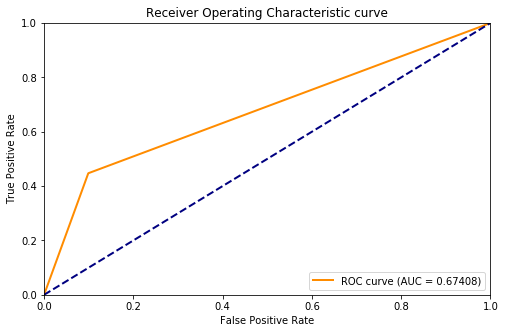

In [23]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_target , predictions)

from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(test_target , predictions)
print("AUC = ", roc_auc)

plt.figure(figsize = (8,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.5f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic curve')
plt.legend(loc="lower right")
plt.show()

In [24]:
f1_score(test_target , predictions)

0.5454545454545455

In [25]:
# Get numerical feature importances
importances = list(clf.best_estimator_.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(inputs_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: aporte_familiar_sin ayuda familiar Importance: 0.18
Variable: edad_21              Importance: 0.08
Variable: edad_20              Importance: 0.05
Variable: aporte_familiar_aporte familiar y otro Importance: 0.05
Variable: madre_ult_est_curs_univesitario-superior Importance: 0.05
Variable: idioma_ingles_basico-desonoce Importance: 0.05
Variable: ingreso_2017         Importance: 0.04
Variable: trabajo_si           Importance: 0.04
Variable: idioma_ingles_bueno-muy bueno Importance: 0.04
Variable: nombre_carrera_Ciencias Biológicas Importance: 0.03
Variable: nombre_carrera_Ingeniería Civil Importance: 0.02
Variable: nombre_carrera_Técnico Mecánico Electricista Importance: 0.02
Variable: prov_procedencia_cordoba Importance: 0.02
Variable: vive_con_familia de origen Importance: 0.02
Variable: obra_social_no       Importance: 0.02
Variable: obra_social_si       Importance: 0.02
Variable: madre_ult_est_curs_secundario Importance: 0.02
Variable: madre_trabajo_trabaja Importance: 0.

In [26]:
brandom=RandomForestClassifier(max_depth= 10, n_estimators= 50)
tree.fit(train_inputs,train_target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

with open(r"randomfores.txt", 'w') as f:
     f = tree.export_graphviz(brandom,
                              out_file=f,
                              #max_depth = 5,
                              impurity = True,
                              feature_names = list(inputs_list),
                              #class_names= ['uno','dos','tres','cuatro','cinco','seis'],
                              rounded = True,
                              filled= True )

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


AttributeError: 'RandomForestClassifier' object has no attribute 'export_graphviz'